<a href="https://colab.research.google.com/github/berndheidemann/notebooks_fastai/blob/master/earthquake/earthquake_learner_gadf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

from fastai.imports import *
import imageio
from fastai.vision import * 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [0]:
!gdown  https://drive.google.com/uc?id=1C5saElCv3syklMQ-S7bQhqH7dFUnA1wC

Downloading...
From: https://drive.google.com/uc?id=1C5saElCv3syklMQ-S7bQhqH7dFUnA1wC
To: /content/earthquake_images._high_res.zip
586MB [00:12, 47.7MB/s]


In [0]:
!mkdir images
!unzip earthquake_images._high_res.zip -d images

Archive:  earthquake_images._high_res.zip
  inflating: images/0.jpg            
  inflating: images/1.jpg            
  inflating: images/2.jpg            
  inflating: images/3.jpg            
  inflating: images/4.jpg            
  inflating: images/5.jpg            
  inflating: images/6.jpg            
  inflating: images/7.jpg            
  inflating: images/8.jpg            
  inflating: images/9.jpg            
  inflating: images/10.jpg           
  inflating: images/11.jpg           
  inflating: images/12.jpg           
  inflating: images/13.jpg           
  inflating: images/14.jpg           
  inflating: images/15.jpg           
  inflating: images/16.jpg           
  inflating: images/17.jpg           
  inflating: images/18.jpg           
  inflating: images/19.jpg           
  inflating: images/20.jpg           
  inflating: images/21.jpg           
  inflating: images/22.jpg           
  inflating: images/23.jpg           
  inflating: images/24.jpg           
  inflat

In [0]:
!ls images |  tail -5

997.jpg
998.jpg
999.jpg
99.jpg
9.jpg


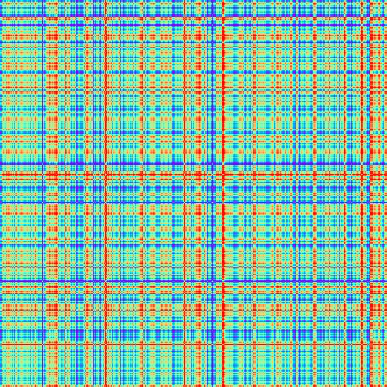

In [0]:
open_image("images/997.jpg")

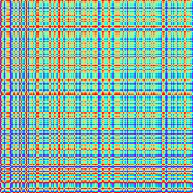

In [0]:
open_image("images/9.jpg")

In [0]:
path="./images"
fnames = get_image_files(path)
#tfms=get_transforms(do_flip=False, max_lighting=0, max_rotate=0, max_warp=0, max_zoom=0, p_affine=1., p_lighting=1.)

In [0]:
!wget https://github.com/berndheidemann/datasets/raw/master/earthquake_features.zip
!unzip earthquake_features.zip

--2019-04-23 18:32:35--  https://github.com/berndheidemann/datasets/raw/master/earthquake_features.zip
Resolving github.com (github.com)... 192.30.255.113, 192.30.255.112
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/berndheidemann/datasets/master/earthquake_features.zip [following]
--2019-04-23 18:32:35--  https://raw.githubusercontent.com/berndheidemann/datasets/master/earthquake_features.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5848057 (5.6M) [application/zip]
Saving to: ‘earthquake_features.zip’

earthquake_features 100%[===================>]   5.58M  --.-KB/s    in 0.05s   

2019-04-23 18:32:36 (123 MB/s) - ‘earthquake_features.z

In [0]:
df_y=pd.read_csv("new_train_y.csv")

In [0]:
def get_target(fname):
  #print(int(fname.name.split(".")[0]))
  return df_y["time_to_failure"].iloc[int(fname.name.split(".")[0])].astype("float")

In [0]:
src=(ImageList.from_folder(path)
    .split_by_idx(range(3500, len(fnames)))
    .label_from_func(get_target, label_cls=FloatList))

NameError: ignored

In [0]:
data = src.transform().databunch(bs=16).normalize(imagenet_stats)

In [0]:
data.show_batch(rows=3, figsize=(7,6))

RuntimeError: ignored

In [0]:
learn=None
gc.collect()


8572

In [0]:
learn = cnn_learner(data, models.resnet101, metrics=mean_absolute_error, wd=0.1)


In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,mean_absolute_error,time
0,19.105516,17.031467,3.230467,02:19
1,13.055119,12.368277,2.833618,02:26
2,12.622679,20.772213,3.213032,02:30
3,10.550822,17.363657,3.084187,02:32


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


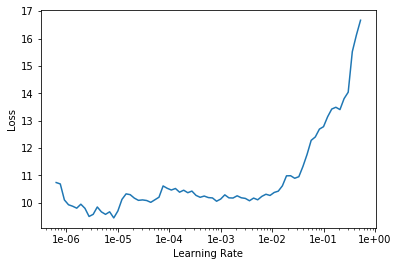

In [0]:
learn.lr_find()
learn.recorder.plot()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


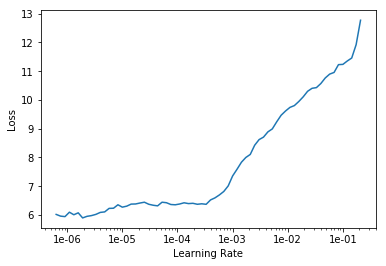

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(4, max_lr=slice(1e-5, 1e-3))

epoch,train_loss,valid_loss,mean_absolute_error,time
0,6.761496,15.147320,3.187370,00:47
1,5.650414,14.343349,3.146278,00:45


Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, b

KeyboardInterrupt: ignored